<a href="https://colab.research.google.com/github/kimherdz/sp-pj-ia/blob/master/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston Housing Regression

##Librerias

In [ ]:

# For graph plotting
import matplotlib.pyplot as plt

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Neural networks
import tensorflow as tf

# Miscellaneous Libraries
import os

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

## Dataset

In [ ]:
#Cargamos el dataset
raw_dataset = pd.read_csv("boston_housing_prices.csv")

#Dataset
print(raw_dataset.columns.tolist())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


## Columnas del dataset

En la siguiente tabla hay un resumen de cada columna del dataset, incluyendo valores atipicos (outliers) detectados con el método IQR.
Observamos que hay una cantidad amplia de outliers en varias columnas por lo que puede afectar negativamente el rendimiento del modelo de regresión.

In [ ]:
raw_dataset = pd.read_csv("boston_housing_prices.csv", header=1)

#detectar outliners
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

#tabla reresumen
resumen = []

for column in raw_dataset.columns:
    if pd.api.types.is_numeric_dtype(raw_dataset[column]):
        resumen.append({
            "Columna": column,
            "Tipo": raw_dataset[column].dtype,
            "Mínimo": raw_dataset[column].min(),
            "Máximo": raw_dataset[column].max(),
            "Media": raw_dataset[column].mean(),
            "Mediana": raw_dataset[column].median(),
            "Desviación Estándar": raw_dataset[column].std(),
            "Outliers": detect_outliers(raw_dataset, column)
        })

df_resumen = pd.DataFrame(resumen)
df_resumen


,Columna,Tipo,Mínimo,Máximo,Media,Mediana,Desviación Estándar,Outliers
0,0.00632,float64,0.00906,88.9762,3.620667,0.25915,8.608572,66
1,18.0,float64,0.00000,100.0000,11.350495,0.00000,23.343704,68
2,2.31,float64,0.46000,27.7400,11.154257,9.69000,6.855868,0
3,0.0,float64,0.00000,1.0000,0.069307,0.00000,0.254227,35
4,0.538,float64,0.38500,0.8710,0.554728,0.53800,0.115990,0
5,6.575,float64,3.56100,8.7800,6.284059,6.20800,0.703195,30
6,65.2,float64,2.90000,100.0000,68.581584,77.70000,28.176371,0
7,4.09,float64,1.12960,12.1265,3.794459,3.19920,2.107757,5
8,1.0,float64,1.00000,24.0000,9.566337,5.00000,8.707553,0
9,296.0,float64,187.00000,711.0000,408.459406,330.00000,168.629992,0


## Analisis de la Data

### CRIM

Esta variable indica el nivel de criminalidad en la zona. Presenta una relación negativa con el precio de la vivienda. A mayo criminalidad, menor precio




###ZN

Esta variable representa el porcentaje de zonas designadas para viviendas de baja densidad. Su relación con PRICE no es tan alta, pero puede aportar contexto urbanístico útil

### INDUS

En esta variable indica la propocio de terreno para uso no residencial, cuanto mayor el valor, más presencia de industrias o comercios hay. Tiene una correlación moderadamente negativa con PRICE, por lo que indica que las casas mas industriales tienden a valer menos.

### CHAS

La variable *CHAS* es una característica binaria que nos indica si la propiedad colinda (1) o no (0) con el río Charles. De todas las muestras solamente 35 casas colindan con el río. Dado el bajo numero de ocurrencias esta variable representa poca variabilidad y no tiene una influencia significativa en el precio de las viviendas, por lo tanto esta variable puede ser descartada para el modelo.




In [ ]:
import pandas as pd

raw_dataset = pd.read_csv("boston_housing_prices.csv")

# Count the occurrences of '0' and '1' in the 'CHAS' column
value_counts = raw_dataset['CHAS'].value_counts()

print(f"Number of 0's in 'CHAS': {value_counts.get(0, 0)}")  # Use .get() to handle cases where '0' might not exist
print(f"Number of 1's in 'CHAS': {value_counts.get(1, 0)}")  # Use .get() to handle cases where '1' might not exist


Number of 0's in 'CHAS': 471
Number of 1's in 'CHAS': 35


### NOX

NOX ejemplifica la concentración de óxidos de nitrógeno (contaminación en el aire) esta tiene una relación negativa considerable con PRICE. Las zonas contaminadas suelen tener casas más baratas




### RM

El promdio de habitaciones por vivienda, es una de las variables con mayo correlación positiva con PRICE. Mientras más habitaciones tiene una vivienda, más valor tiende a tener.

### AGE

Porcentaje de viviendas construidads antes de 1940, mide que tan "viejo" es el vecindario. Tiene relación no lineal con PRICE.

Correlación entre AGE y PRICE: -0.3770


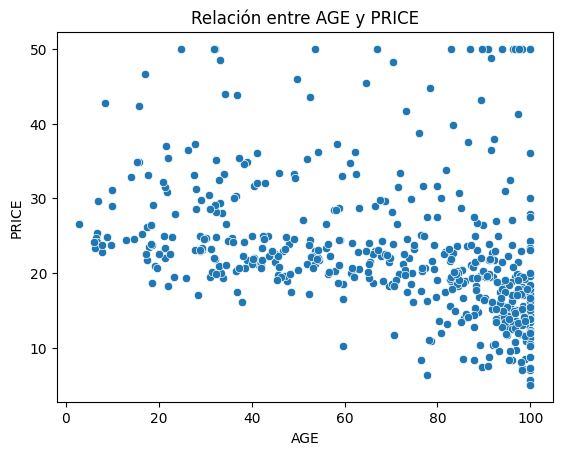

In [ ]:
# Correlación con PRICE
correlacion_age = raw_dataset['AGE'].corr(raw_dataset['PRICE'])
print(f"Correlación entre AGE y PRICE: {correlacion_age:.4f}")

# Visualización de relación AGE vs PRICE
sns.scatterplot(data=raw_dataset, x='AGE', y='PRICE')
plt.title("Relación entre AGE y PRICE")
plt.show()


### DIS

Esta variable es la distancia a centros de empleo, relacionada con el acceso laboral, relacion con PRICE positiva. Mayor distancia, mayor precio en las viviendas

### RAD

RAD representa el índice de accesibilidad a autopistas. Tiene una relación baja con PRICE, ademas esta parcialmente correlacionada con otras variables como TAX

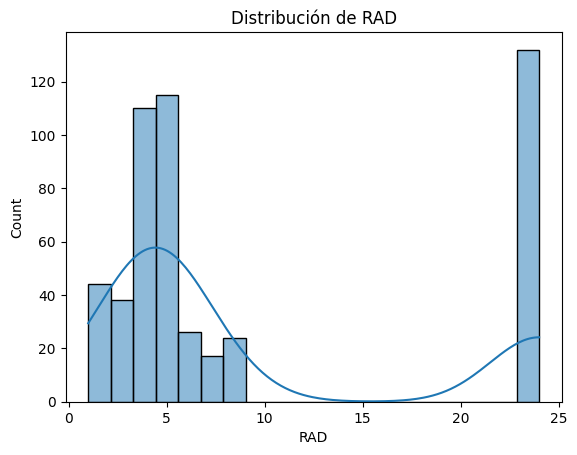

Correlación entre RAD y PRICE: -0.3816


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(raw_dataset['RAD'], kde=True, bins=20)
plt.title("Distribución de RAD")
plt.show()

# Correlación con PRICE
correlacion_rad = raw_dataset['RAD'].corr(raw_dataset['PRICE'])
print(f"Correlación entre RAD y PRICE: {correlacion_rad:.4f}")

### TAX

Tasa de impuestos de la propiedad, tiene una correlacion moderada con PRICE, aunque tiene outliners es útil para representar el valor del vecindario

### PTRATIO

Esta variable ve la relación alumno/profesor. Cuanto menor es este valor, mayor calidad educativa y mayor precio de las casas.

### B

La variable B es una fórmula, donde Bk es la proporción de personas afroamericanas en el vecindario

> B = 100(Bk - 0.63)^2



In [ ]:

correlacion_b = raw_dataset['B'].corr(raw_dataset['PRICE'])
print(f"Correlación entre B y PRICE: {correlacion_b:.4f}")


Correlación entre B y PRICE: 0.3335


A pesar de ser variable numérica, tiene origen racial sencible. Además tiene baja correlación con PRICE.

### LSTAT

Representa el porcentaje de población con bajos ingresos, tiene una de las correlaciones mas fuertes con PRICE, aunque negativa.

### PRICE

Variable objetivo del modelo, todas las demás variables explicativas apuntan a predecir su valor.

# Modelo 1

## Verificación del Dataset

In [ ]:
dataset = pd.read_csv(
    "boston_housing_prices.csv",
    na_values="?",
    comment="\t",
    sep=",",
    skipinitialspace=True
)

print(dataset.dtypes)
print(dataset.describe())

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.7

## Limpiar el Dataset

In [ ]:
columnas_a_eliminar = ['CHAS', 'B', 'RAD', 'AGE']
raw_dataset1 = dataset.drop(columns=columnas_a_eliminar)

print(raw_dataset1.columns)

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT',
       'PRICE'],
      dtype='object')


## Copia del Dataset

In [ ]:
new_dataset = raw_dataset1.copy()

#Verificación de NULL
print(new_dataset.isna().sum())
new_dataset = new_dataset.dropna()
new_dataset.head()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
DIS        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,NOX,RM,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,4.0900,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,4.9671,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,4.9671,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,6.0622,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,6.0622,222.0,18.7,5.33,36.2


## Separación de Variables

In [ ]:
train, test = train_test_split(new_dataset, test_size=0.2)

independent_variables = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
dependent_variable = ['PRICE']

train_set = train[independent_variables]
train_target = train[dependent_variable]

test_set = test[independent_variables]
test_target = test[dependent_variable]

## Normalización de Variables

In [ ]:
# Convertir datos tipo 'object' a 'numeric'
train_set = train_set.apply(pd.to_numeric, errors='coerce')
test_set = test_set.apply(pd.to_numeric, errors='coerce')
train_target = train_target.apply(pd.to_numeric, errors='coerce')
test_target = test_target.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(train_set.isna().sum())
print(test_set.isna().sum())
print(train_target.isna().sum())
print(test_target.isna().sum())

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
DIS        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64
CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
DIS        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64
PRICE    0
dtype: int64
PRICE    0
dtype: int64


In [ ]:
# Elinimar datos Nan's
train_set = train_set.dropna()
test_set = test_set.dropna()
train_target = train_target.loc[train_set.index]
test_target = test_target.loc[test_set.index]

In [ ]:
# Escalado de valores
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=independent_variables)
test_set = pd.DataFrame(scaler.transform(test_set), columns=independent_variables)

## Arquitectura del Modelo

In [ ]:
modelo1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(len(independent_variables),)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

modelo1.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Entrenamiento del Modelo

In [ ]:
historial1 = modelo1.fit(train_set,
          train_target,
          epochs=15,
          batch_size = 32,
          validation_split=0.2,
        )

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 563.9769 - root_mean_squared_error: 23.7289 - val_loss: 613.1761 - val_root_mean_squared_error: 24.7624
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 553.2955 - root_mean_squared_error: 23.5020 - val_loss: 554.7228 - val_root_mean_squared_error: 23.5526
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 492.9595 - root_mean_squared_error: 22.1904 - val_loss: 456.0661 - val_root_mean_squared_error: 21.3557
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 333.1797 - root_mean_squared_error: 18.2378 - val_loss: 308.0536 - val_root_mean_squared_error: 17.5515
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 231.4792 - root_mean_squared_error: 15.1970 - val_loss: 155.5110 - val_root_mean_squared_error: 12.4704
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 119.2565 - root_mean_squared_error: 10.9157 - val_loss: 93.8533 - val_root_mean_squared_error: 9.6878
Epoch 7/15
11/11 ━━━━━━━━━

## Evalucación del Modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred1 = modelo1.predict(test_set)

mae = mean_absolute_error(test_target, y_pred1)
rmse = np.sqrt(mean_squared_error(test_target, y_pred1))
r2 = r2_score(test_target, y_pred1)

# R² ajustado
n = len(test_target)
p = test_set.shape[1]
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {r2_ajustado:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 3.31
RMSE: 4.25
R²: 0.7319
R² Ajustado: 0.7056


## Visualización de Resultados

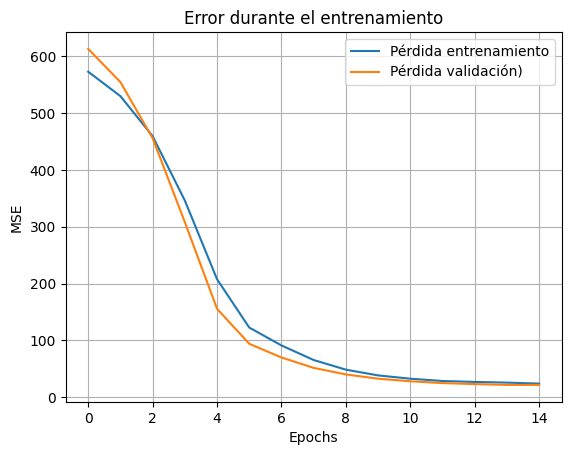

In [ ]:
import matplotlib.pyplot as plt

plt.plot(historial1.history['loss'], label='Pérdida entrenamiento')
plt.plot(historial1.history['val_loss'], label='Pérdida validación)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Error durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

#Modelo 2

## Limpieza y Análisis Inicial

In [ ]:
# Eliminación de columnas
columnas_a_eliminar = ['CHAS', 'B', 'RAD', 'AGE']

#dataset limpio
cleaned_dataset = raw_dataset.drop(columns=columnas_a_eliminar)

## Normalización de Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separación caracteristicas y variable objetivo
X = cleaned_dataset.drop(columns=['PRICE'])
y = cleaned_dataset['PRICE']

# Normalización
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos entrenamiento/prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## Arquitectura del Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Creación Modelo
modelo2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Entrenamiento del Modelo

In [ ]:
# Compilar
modelo2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entreno
historial2 = modelo2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 597.1152 - mae: 22.4113 - val_loss: 506.0920 - val_mae: 20.8409
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 550.9868 - mae: 21.2839 - val_loss: 434.5067 - val_mae: 18.9834
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 425.1085 - mae: 18.4601 - val_loss: 319.2736 - val_mae: 15.5844
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 352.6305 - mae: 15.9651 - val_loss: 187.7853 - val_mae: 10.9525
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 204.9286 - mae: 11.0515 - val_loss: 114.6451 - val_mae: 8.2857
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 142.3623 - mae: 8.8664 - val_loss: 99.2001 - val_mae: 7.5766
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 145.2154 - mae: 9.0674 - val_loss: 87.0784 - val_mae: 6.8953
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 116.0434 - mae: 8.4782 - val_loss: 78.4181 - val_mae: 6.4009
Epoch 9/100
21/21 ━━━━━━━

## Evaluación del Modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred3 = modelo2.predict(X_test).flatten()

# Métricas
mae = mean_absolute_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
r2 = r2_score(y_test, y_pred3)
n = len(y_test)
p = X_test.shape[1]
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {r2_ajustado:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 2.70
RMSE: 4.41
R²: 0.7350
R² Ajustado: 0.7091


## Visualización de Resultados

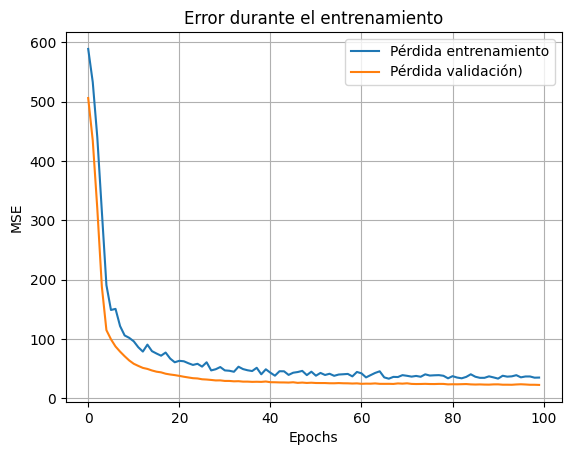

In [ ]:
import matplotlib.pyplot as plt

plt.plot(historial2.history['loss'], label='Pérdida entrenamiento')
plt.plot(historial2.history['val_loss'], label='Pérdida validación)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Error durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


#Modelo 3

## Librerías

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## Dataset


In [ ]:
raw_train_dataset = pd.read_csv("boston_housing_prices.csv")
processed_dataset = raw_train_dataset.copy()
raw_train_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Normalización del Dataset


In [ ]:
processed_dataset['NOX'] = (processed_dataset['NOX'].max() - processed_dataset['NOX']) / (processed_dataset['NOX'].max() - processed_dataset['NOX'].min())

In [ ]:
processed_dataset['NOX'] = (processed_dataset['NOX'].max() - processed_dataset['NOX']) / (processed_dataset['NOX'].max() - processed_dataset['NOX'].min())

In [ ]:
processed_dataset['TAX'] = (processed_dataset['TAX'].max() - processed_dataset['TAX']) / (processed_dataset['TAX'].max() - processed_dataset['TAX'].min())

In [ ]:
### --- MIN-MAX NORMALIZATION ---
max_zn = np.max(processed_dataset['ZN'])
min_zn = np.min(processed_dataset['ZN'])
print('Max ZN level: {}\t Min ZN level: {}'.format(max_zn, min_zn))

def normalize_zn(x):
  return (x-min_zn)/(max_zn-min_zn)

processed_dataset['ZN'] = processed_dataset['ZN'].apply(normalize_zn)

processed_dataset['ZN'].unique()

Max ZN level: 100.0	 Min ZN level: 0.0


array([0.18 , 0.   , 0.125, 0.75 , 0.21 , 0.9  , 0.85 , 1.   , 0.25 ,
       0.175, 0.8  , 0.28 , 0.45 , 0.6  , 0.95 , 0.825, 0.3  , 0.22 ,
       0.2  , 0.4  , 0.55 , 0.525, 0.7  , 0.34 , 0.33 , 0.35 ])

In [ ]:
processed_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,0.18,2.31,0.0,0.314815,6.575,65.2,4.0900,1.0,0.791985,15.3,396.90,4.98,24.0
1,0.02731,0.00,7.07,0.0,0.172840,6.421,78.9,4.9671,2.0,0.895038,17.8,396.90,9.14,21.6
2,0.02729,0.00,7.07,0.0,0.172840,7.185,61.1,4.9671,2.0,0.895038,17.8,392.83,4.03,34.7
3,0.03237,0.00,2.18,0.0,0.150206,6.998,45.8,6.0622,3.0,0.933206,18.7,394.63,2.94,33.4
4,0.06905,0.00,2.18,0.0,0.150206,7.147,54.2,6.0622,3.0,0.933206,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,11.93,0.0,0.386831,6.593,69.1,2.4786,1.0,0.835878,21.0,391.99,9.67,22.4
502,0.04527,0.00,11.93,0.0,0.386831,6.120,76.7,2.2875,1.0,0.835878,21.0,396.90,9.08,20.6
503,0.06076,0.00,11.93,0.0,0.386831,6.976,91.0,2.1675,1.0,0.835878,21.0,396.90,5.64,23.9
504,0.10959,0.00,11.93,0.0,0.386831,6.794,89.3,2.3889,1.0,0.835878,21.0,393.45,6.48,22.0


In [ ]:
processed_dataset['AGE'] = processed_dataset['AGE'].apply(lambda x: 1 if x < 50 else 0)

In [ ]:
processed_dataset = processed_dataset.drop('CHAS', axis=1)
processed_dataset = processed_dataset.drop('B', axis=1)
processed_dataset = processed_dataset.drop('LSTAT', axis=1)
processed_dataset = processed_dataset.drop('RAD', axis=1)

## Separación de Variables

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# training and testing
train, test = train_test_split(processed_dataset, test_size=0.2)

# features and target
independent_variables = list(processed_dataset.columns)
independent_variables.remove('PRICE')
dependent_variables = ['PRICE']

train_set = train[independent_variables]
train_target = train[dependent_variables]
test_set = test[independent_variables]
test_target = test[dependent_variables]

## Arquitectura del Modelo

In [ ]:
# Build regression model
normal_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

normal_model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## Entrenamiento del Modelo

In [ ]:
# Train model
historial3 = normal_model.fit(
                  train_set,
                  train_target,
                  epochs=150,
                  batch_size=256,
                  validation_split=0.2,
              )

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - loss: 581.0663 - mean_absolute_error: 22.2750 - val_loss: 563.1240 - val_mean_absolute_error: 21.8237
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 572.8324 - mean_absolute_error: 22.1186 - val_loss: 555.4427 - val_mean_absolute_error: 21.6380
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 560.5268 - mean_absolute_error: 21.8489 - val_loss: 545.5306 - val_mean_absolute_error: 21.3953
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 556.1812 - mean_absolute_error: 21.6830 - val_loss: 532.6081 - val_mean_absolute_error: 21.0763
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 548.8880 - mean_absolute_error: 21.4593 - val_loss: 516.0049 - val_mean_absolute_error: 20.6577
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 527.8187 - mean_absolute_error: 20.9912 - val_loss: 495.7333 - val_mean_absolute_error: 20.1329
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 507.3459 - mean

## Evaluación

In [62]:
# Predict and evaluate
predictions = normal_model.predict(test_set).flatten()
true_values = test_target.values.flatten()

# Metrics
mae = mean_absolute_error(true_values, predictions)
rmse = np.sqrt(mean_squared_error(true_values, predictions))
r2 = r2_score(true_values, predictions)
n = test_set.shape[0]
k = test_set.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print evaluation results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {adjusted_r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
MAE: 3.3531
RMSE: 5.5716
R²: 0.7159
R² Ajustado: 0.6881


## Visualización de Resultados

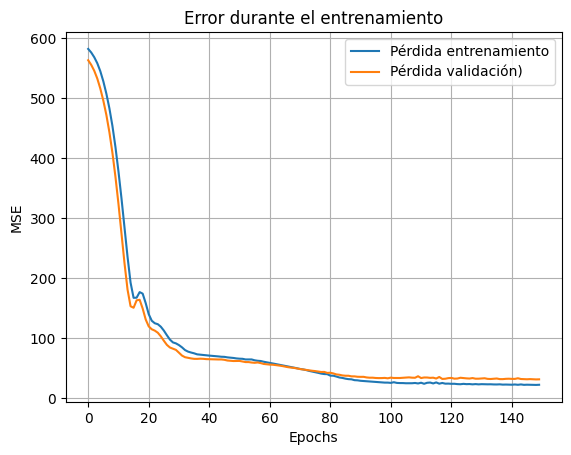

In [ ]:
import matplotlib.pyplot as plt

plt.plot(historial3.history['loss'], label='Pérdida entrenamiento')
plt.plot(historial3.history['val_loss'], label='Pérdida validación)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Error durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()



#Comparación Modelos

Al comparar el rendimiento de los tres modelos, se observa que el Modelo 2 presenta los mejores resultados generales, obtuvo el menor MAE (2.70) y el mayor coeficiente de determinación R² (0.7350), lo que indica que realiza predicciones más precisas y explica mejor la variabilidad de los datos. Aunque el Modelo 1 tiene un RMSE menor (4.25), su R² es un poco más bajo (0.7319), lo que sugiere un buen desempeño, pero un poco inferior al Modelo 2. Por otro lado, el Modelo 3 muestra el peor rendimiento en todas las métricas, con un RMSE más alto (5.05) y un R² más bajo (0.6812), por lo que no sería la opción más adecuada. En resumen, el Modelo 2 es el más balanceado y preciso para este conjunto de datos.